In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/Deeplearning/archive.zip'

In [ ]:
extract_to_path = '/content/drive/MyDrive/Deeplearning/dataset'

In [ ]:
dataset = '/content/drive/MyDrive/Deeplearning/dataset/raw-img'

In [ ]:
'''import zipfile
import os

os.makedirs(extract_to_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Files extracted to:", extract_to_path)'''

'import zipfile\nimport os\n\nos.makedirs(extract_to_path, exist_ok=True)\n\n# Unzip the file\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    zip_ref.extractall(extract_to_path)\n\nprint("Files extracted to:", extract_to_path)'

In [ ]:
import os
from PIL import Image
import pandas as pd

def read_images_from_directory(base_path):
    image_data = []

    for label in os.listdir(base_path):
        label_path = os.path.join(base_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                if image_name.lower().endswith('.jpeg'):
                    image_path = os.path.join(label_path, image_name)
                    if os.path.isfile(image_path):
                        try:

                            with Image.open(image_path) as img:
                                img.verify()
                            image_data.append((image_path, label))
                        except (IOError, SyntaxError) as e:
                            print(f"Skipping file {image_path}, it is not a valid image.")

    df = pd.DataFrame(image_data, columns=['image_path', 'label'])
    return df

df_images = read_images_from_directory(dataset)
print(df_images.tail())


Skipping file /content/drive/MyDrive/Deeplearning/dataset/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg, it is not a valid image.
                                              image_path       label
24203  /content/drive/MyDrive/Deeplearning/dataset/ra...  scoiattolo
24204  /content/drive/MyDrive/Deeplearning/dataset/ra...  scoiattolo
24205  /content/drive/MyDrive/Deeplearning/dataset/ra...  scoiattolo
24206  /content/drive/MyDrive/Deeplearning/dataset/ra...  scoiattolo
24207  /content/drive/MyDrive/Deeplearning/dataset/ra...  scoiattolo


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Deeplearning/dataset/resize_images')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output_csv_path = '/content/drive/MyDrive/Deeplearning/dataset/animals.csv'
df_images.to_csv(output_csv_path, index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Deeplearning/dataset/animals.csv')

In [ ]:
data.head()

,image_path,label
0,/content/drive/MyDrive/Deeplearning/dataset/ra...,cane
1,/content/drive/MyDrive/Deeplearning/dataset/ra...,cane
2,/content/drive/MyDrive/Deeplearning/dataset/ra...,cane
3,/content/drive/MyDrive/Deeplearning/dataset/ra...,cane
4,/content/drive/MyDrive/Deeplearning/dataset/ra...,cane


In [ ]:
import matplotlib.pyplot as plt

def display_image(image_path):
    try:
        with Image.open(image_path) as img:
            plt.imshow(img)
            plt.axis('on')
            plt.show()
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

Displaying image: /content/drive/MyDrive/Deeplearning/dataset/raw-img/cane/OIP-mrcAcvmhFZQ7F1aVtiKjpQHaE8.jpeg


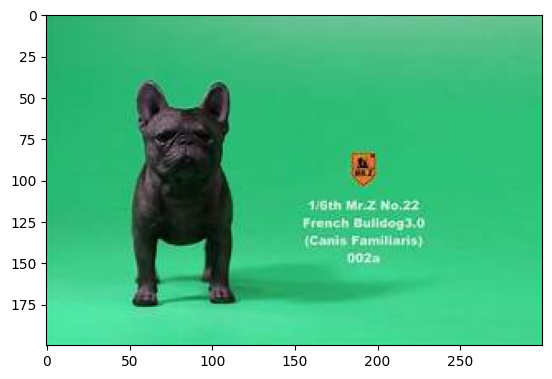

Displaying image: /content/drive/MyDrive/Deeplearning/dataset/raw-img/cane/OIP-mtcIhX8yPosJtN7YR0yauAHaE6.jpeg


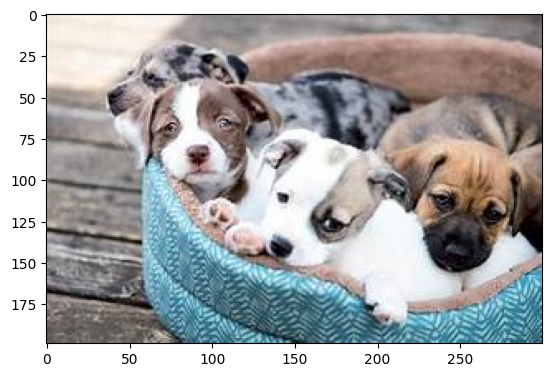

Displaying image: /content/drive/MyDrive/Deeplearning/dataset/raw-img/cane/OIP-mtdnqll_AgymcZ_xKi5yAwHaEm.jpeg


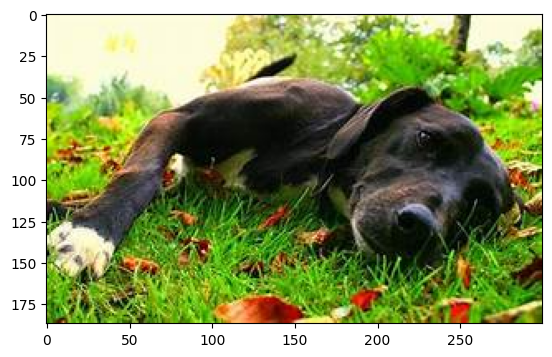

Displaying image: /content/drive/MyDrive/Deeplearning/dataset/raw-img/cane/OIP-mtjp2wVGxWVDDkV8oRrnrAHaNL.jpeg


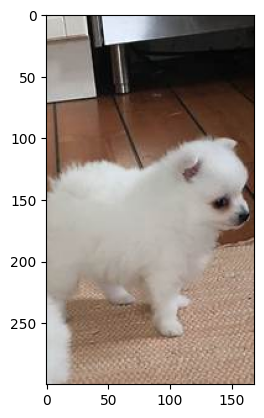

Displaying image: /content/drive/MyDrive/Deeplearning/dataset/raw-img/cane/OIP-muFCGG6Qau1iKG9UZIk3SQHaFA.jpeg


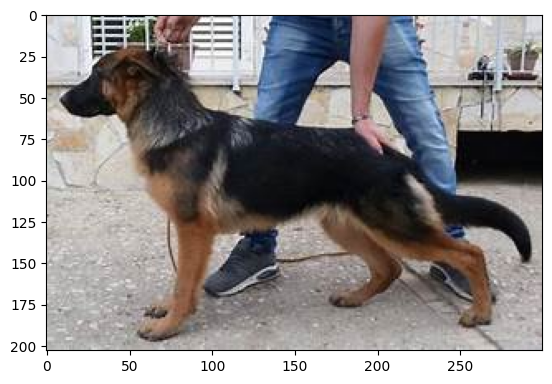

In [ ]:
for idx, row in data.head(5).iterrows():
    image_path = row['image_path']
    print(f"Displaying image: {image_path}")
    display_image(image_path)

In [ ]:
import os
import cv2
import pandas as pd


new_width = 100
new_height = 100

save_directory = "/content/drive/MyDrive/Deeplearning/dataset/resize_images"
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

for index, row in data.iterrows():
    image_path = row['image_path']
    label = row['label']

    img = cv2.imread(image_path)

    if img is None:
        print(f"Warning: Image at {image_path} could not be read. Skipping this file.")
        continue

    resized_img = cv2.resize(img, (new_width, new_height))

    new_image_path = os.path.join(save_directory, f"{label}_{index}.jpeg")

    cv2.imwrite(new_image_path, resized_img)

    print(f"Saved resized image to {new_image_path}")


Streaming output truncated to the last 5000 lines.
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19208.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19209.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19210.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19211.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19212.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19213.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19214.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19215.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/resize_images/ragno_19216.jpeg
Saved resized image to /content/drive/MyDrive/Deeplearning/dataset/

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import DatasetFolder
from torch.utils.data import DataLoader, random_split

base_dir = '/content/drive/MyDrive/Deeplearning/dataset/resize_images'

def extract_label(filename):
    return filename.split('_')[0]

class CustomDataset(DatasetFolder):
    def __init__(self, root, loader, extensions=None, transform=None, target_transform=None):
        super().__init__(root, loader, extensions=extensions, transform=transform, target_transform=target_transform)

    def find_classes(self, directory):
        return ['dummy'], {'dummy': 0}

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

full_dataset = CustomDataset(base_dir, loader=torchvision.datasets.folder.default_loader, transform=transform, target_transform=extract_label)

train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

class_names = full_dataset.classes
num_classes = len(class_names)
print("Class Names:", class_names)
print("Number of Classes:", num_classes)


In [ ]:
import torchvision.models as models

model = models.vgg19(pretrained=False)

model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
def train_model(model, criterion, optimizer, num_epochs=epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    print(f'Best val Acc: {best_acc:4f}')

    model.load_state_dict(best_model_wts)
    return model

model = train_model(model, criterion, optimizer, num_epochs=epochs)


In [ ]:
def evaluate_model(model):
    model.eval()
    running_corrects = 0

    for inputs, labels in dataloaders['val']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)

    val_acc = running_corrects.double() / dataset_sizes['val']
    print(f'Validation Accuracy: {val_acc:.4f}')

evaluate_model(model)
